<a href="https://colab.research.google.com/github/paresh-nayak04/Titanic-ML-Project/blob/main/Titanic_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()  # Upload titanic.zip

Saving titanic.zip to titanic.zip


In [2]:
import zipfile
import os

# Replace 'titanic.zip' with the uploaded file name if different
with zipfile.ZipFile("titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("titanic_data")  # Extract to folder 'titanic_data'

# List files
os.listdir("titanic_data")

['test.csv', 'train.csv', 'gender_submission.csv']

In [5]:
import pandas as pd

# Load training data
train_df = pd.read_csv("titanic_data/train.csv")
train_df.head()

# Load test data
test_df = pd.read_csv("titanic_data/test.csv")
test_df.head()

# Load gender submission data
gender_submission_df = pd.read_csv("titanic_data/gender_submission.csv")
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
# Features for prediction
X_train = train_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_train = train_df['Survived']

# Prepare test data
X_test = test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Fit and transform 'Sex' using .loc to avoid SettingWithCopyWarning
X_train.loc[:, 'Sex'] = le_sex.fit_transform(X_train['Sex'])
X_test.loc[:, 'Sex'] = le_sex.transform(X_test['Sex'])

# Fit and transform 'Embarked' using .loc to avoid SettingWithCopyWarning
X_train.loc[:, 'Embarked'] = le_embarked.fit_transform(X_train['Embarked'].astype(str))
# Fill missing Embarked values in test set before encoding using .loc
X_test.loc[:, 'Embarked'] = X_test['Embarked'].fillna(X_test['Embarked'].mode()[0])
X_test.loc[:, 'Embarked'] = le_embarked.transform(X_test['Embarked'].astype(str))


# Fill missing values using .loc to avoid SettingWithCopyWarning
X_train.loc[:, 'Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_train.loc[:, 'Fare'] = X_train['Fare'].fillna(X_train['Fare'].median())
X_test.loc[:, 'Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_test.loc[:, 'Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())


# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)



# Predict
predictions = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

submission.to_csv("titanic_submission.csv", index=False)
print("Submission file saved as titanic_submission.csv")

Submission file saved as titanic_submission.csv


In [13]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


<Axes: xlabel='Pclass', ylabel='Survived'>

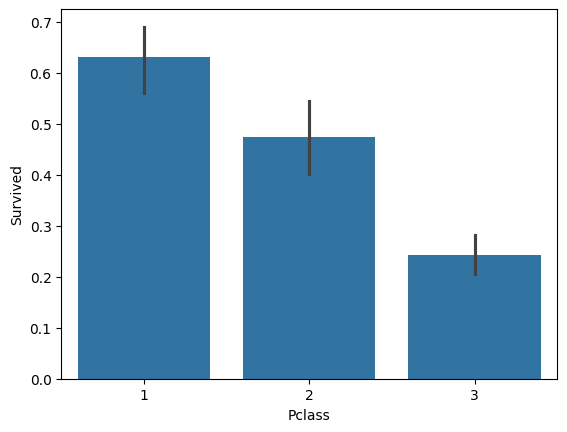

In [14]:
import seaborn as sns
sns.barplot(x='Pclass', y='Survived', data=train_df)

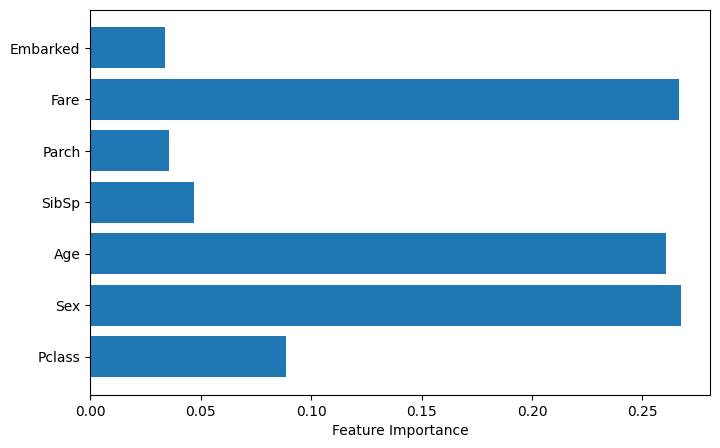

In [15]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.show()

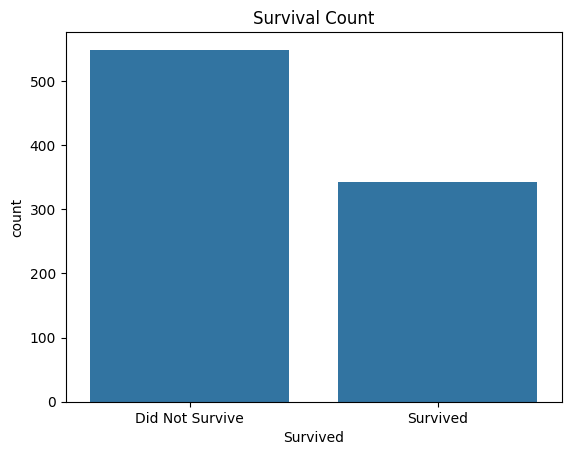

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.xticks([0,1], ["Did Not Survive", "Survived"])
plt.show()

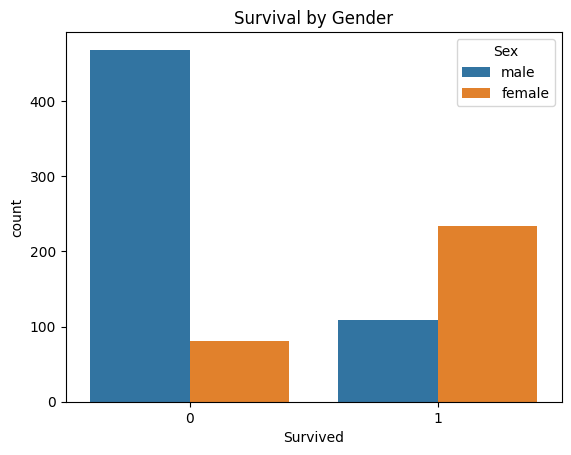

In [17]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title("Survival by Gender")
plt.show()

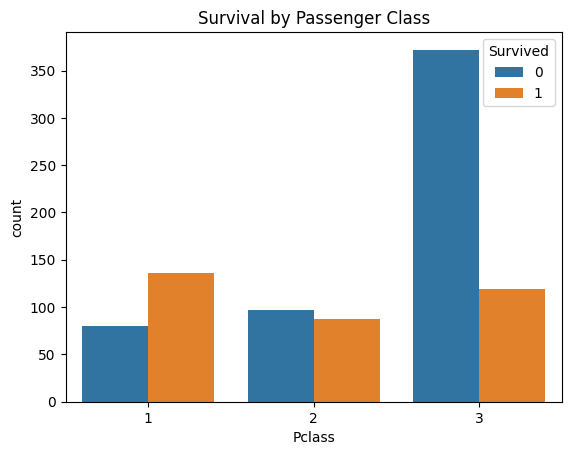

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

/tmp/ipython-input-634670454.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Survived']==1, 'Age'], label="Survived", shade=True)
/tmp/ipython-input-634670454.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Survived']==0, 'Age'], label="Did Not Survive", shade=True)


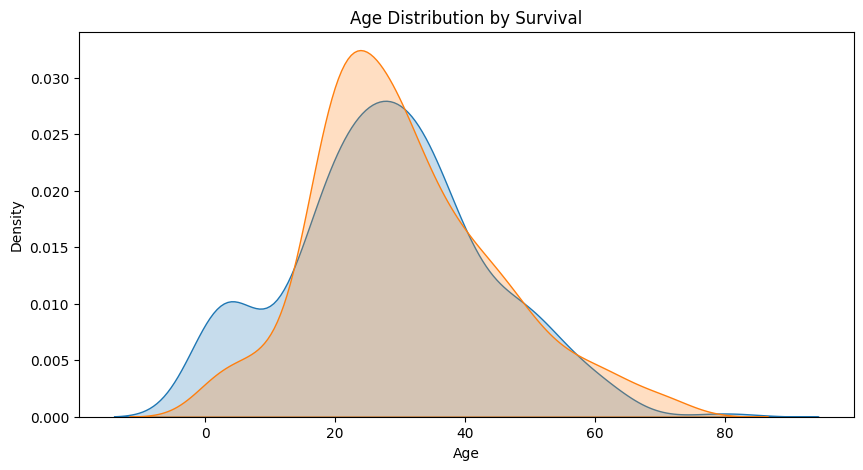

In [19]:
plt.figure(figsize=(10,5))
sns.kdeplot(train_df.loc[train_df['Survived']==1, 'Age'], label="Survived", shade=True)
sns.kdeplot(train_df.loc[train_df['Survived']==0, 'Age'], label="Did Not Survive", shade=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.show()

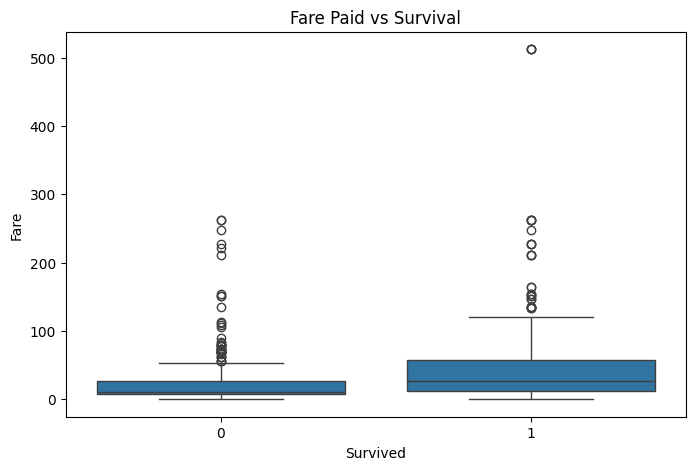

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title("Fare Paid vs Survival")
plt.show()

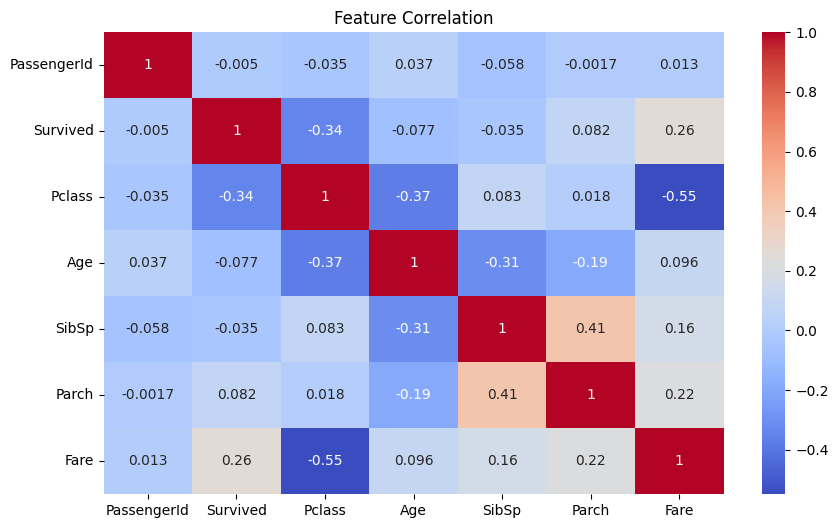

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

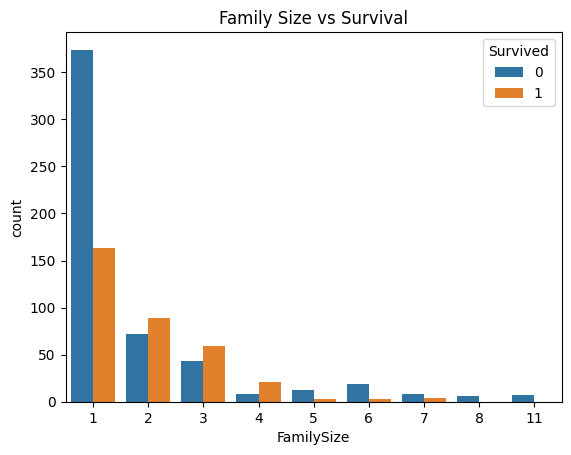

In [23]:
# Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

sns.countplot(x='FamilySize', hue='Survived', data=train_df)
plt.title("Family Size vs Survival")
plt.show()